In [1]:
include("functions.jl")

read_faculty_data (generic function with 1 method)

###  仮定
学科の方向性, 生徒の趣向は一様分布0 ~ 1

学科のlevelは一様分布0~1

生徒の成績は正規分布に従う(0.5が平均になるように調整)

In [2]:
faculty_num = 5
students_num = 100
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)

#println(s_prefs)
#println(f_prefs)

s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

println(s_matched, f_matched)
#sorted_students_list = get_sorted_students_list(students_list, faculties_list)
#println(sorted_students_list)


[0,2,2,2,5,5,3,2,0,0,2,0,0,5,1,1,1,1,5,1,1,0,3,2,5,2,2,0,0,2,0,1,1,5,1,2,3,3,5,3,2,5,2,0,5,0,0,2,0,1,0,2,1,3,3,3,3,3,0,0,1,0,3,3,3,2,0,0,0,0,1,5,0,1,0,5,5,1,0,5,2,0,1,0,5,0,5,0,0,0,0,3,2,0,2,2,1,2,3,1][100,16,17,97,53,35,61,50,71,33,74,18,78,32,21,15,20,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,30,95,93,81,43,52,3,98,41,4,8,11,36,27,66,24,26,96,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,58,38,40,92,64,54,99,55,56,63,23,37,65,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

各学部への応募の偏りです.

In [3]:
faculty_num = 20
students_num = 1000
mu = 50
sigma2 = 30
sigma2_error = 5

faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)
println()

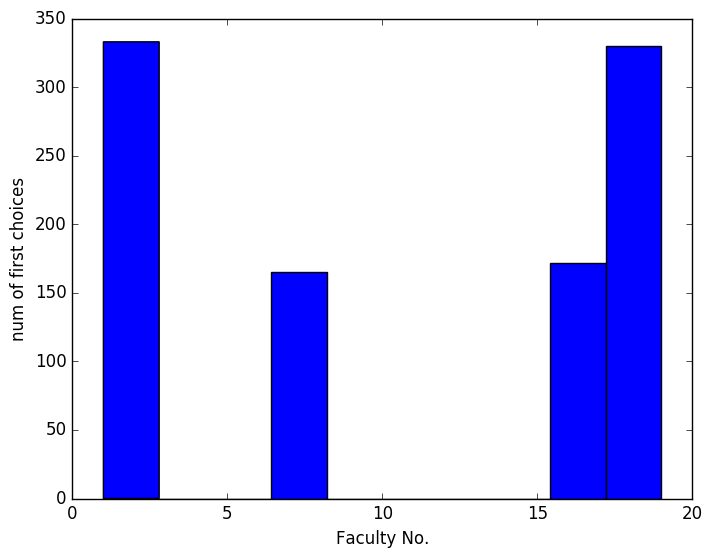

In [4]:
using PyPlot
fig, ax = subplots()
ax[:hist]([s_prefs[1, i] for i in 1:size(s_prefs, 2)])
xlabel("Faculty No.")
ylabel("num of first choices")
legend()

ある学部へ第一希望で応募する人の成績の分布です.

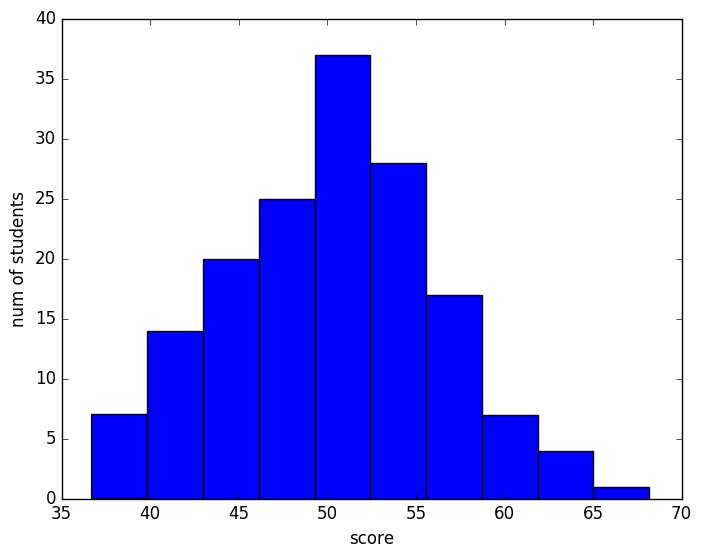

In [6]:
fig, ax = subplots()
ax[:hist](map(s -> s.level, filter(s -> s.prefs[1] == 19, students_list)))
xlabel("score")
ylabel("num of students")
#title(" $faculties_list[17].name")
legend()

生徒の成績と生徒の学部への選好が独立だと仮定しているので正規分布となりました.

<!--function cauchy()
    return tan(pi*(rand()-1/2))
end
cauchy()
l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    cauchies = Array(Float64, num)
    for i in 1:num
        cauchies[i] = cauchy()
    end
    means[k] = mean(cauchies)
end
#cauchies
plot(means)
fig, ax = subplots()
ax[:hist](means)

l = 100
means = Array(Float64, l)
for k in 1:l
    num = 10
    rands = Array(Float64, num)
    for i in 1:num
        rands[i] = rand()
    end
    means[k] = mean(rands)
end
#cauchies
plot(means)
fig, ax = subplots()
ax[:hist](means)-->

In [7]:
include("functions.jl")
faculty_num = 20
student_num = 200
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

ev1 = []
ev2 = []
ev3 = []
ev4 = []
ev5 = []

for cap in 2:40
    faculties_list = [Faculty(string(i), i, Array(Int, student_num+1), rand(), rand(), cap, [i]) for i in 1:faculty_num]
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> 0)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    push!(ev1, evaluate_matched(s_matched, s_prefs))
    push!(ev2, evaluate_matched2(s_matched, s_prefs))
    push!(ev3, evaluate_matched3(s_matched, s_prefs))
    push!(ev4, evaluate_matched4(s_matched, s_prefs))
    push!(ev5, evaluate_matched5(s_matched, s_prefs))
    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
end

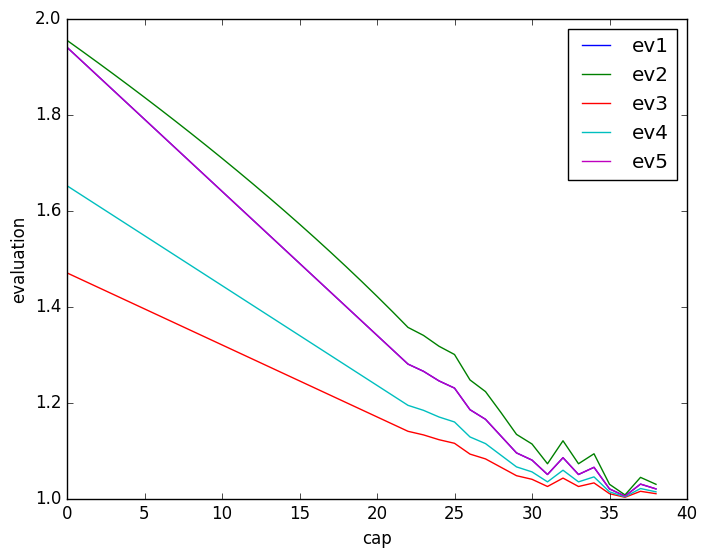

PyObject <matplotlib.legend.Legend object at 0x31a6549e8>

In [8]:
using PyPlot
plot(ev1, label="ev1")
plot(ev2, label="ev2")
plot(ev3, label="ev3")
plot(ev4, label="ev4")
plot(ev5, label="ev5")
xlabel("cap")
ylabel("evaluation")
legend()

以降, 実際にシミュレーションしてみます.

簡単のため, capsの合計がほぼ1000なので, 第二段階利用人数は1000人とします.
まず成績しか見ないで応募する場合について,

In [9]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

faculties_list = read_faculty_data("revised.csv", student_num)
faculty_num = length(faculties_list)
students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> 0)

set_prefs_faculties(faculties_list, students_list)
set_prefs_students(students_list, faculties_list)
#println(faculties_list)

s_prefs = generate_prefs(students_list)
f_prefs = generate_prefs(faculties_list)
caps = generate_caps(faculties_list)
println()

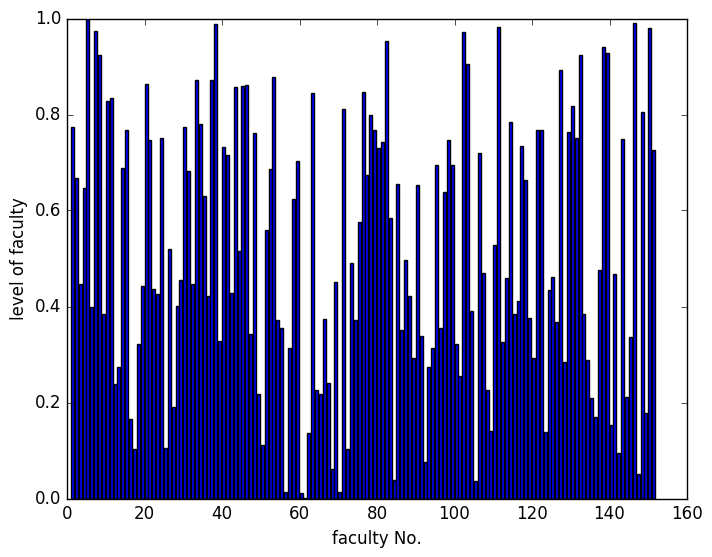

PyObject <matplotlib.text.Text object at 0x31a8b9a90>

In [10]:
fig, ax = subplots()
ax[:bar]([f.id for f in faculties_list], [f.level for f in faculties_list])
ylabel("level of faculty")
xlabel("faculty No.")

学科のlevelのヒストグラムです.

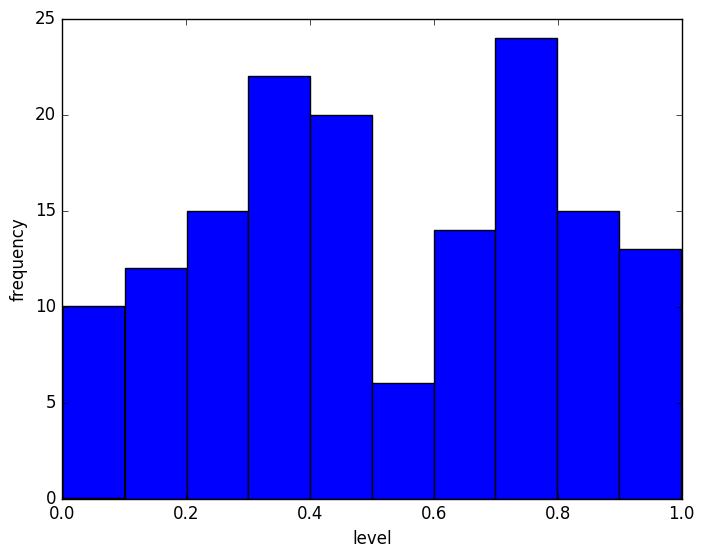

PyObject <matplotlib.text.Text object at 0x31aaa5898>

In [11]:
fig, ax = subplots()
ax[:hist]([f.level for f in faculties_list])
ylabel("frequency")
xlabel("level")

学科の方向性のヒストグラムです.

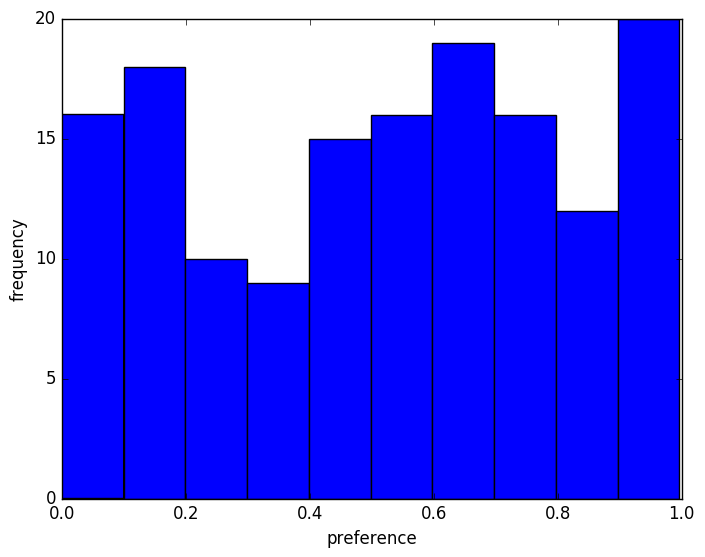

In [12]:
fig, ax = subplots()
ax[:hist]([f.preference for f in faculties_list])
ylabel("frequency")
xlabel("preference")
legend()

In [13]:
DA.check_data(s_prefs, f_prefs)

true

In [14]:
s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

([148,0,136,0,120,131,131,0,0,131  …  131,0,0,124,7,9,1,62,131,82],[240,494,499,498,403,131,675,724,429,349  …  556,515,687,388,0,0,0,0,0,0],[1,119,120,121,122,123,125,206,209,227  …  881,884,890,892,898,906,930,963,971,977])

以下マッチングの指標について.
少なければ全体としてより良いと考えられます.

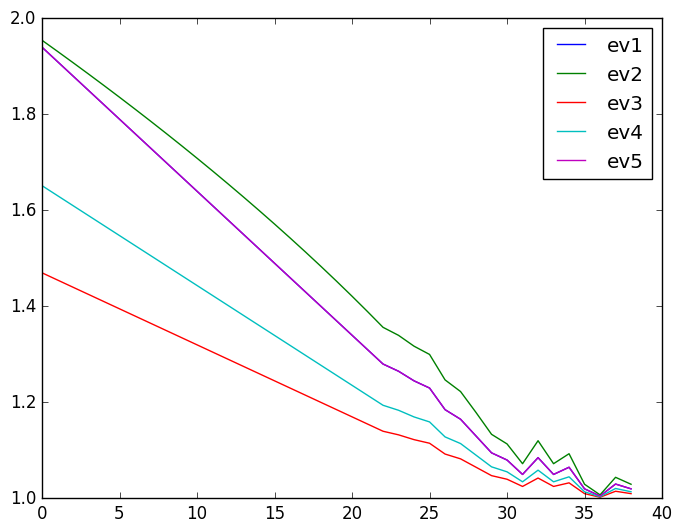

PyObject <matplotlib.legend.Legend object at 0x31b3717b8>

In [15]:
using PyPlot
plot(ev1, label="ev1")
plot(ev2, label="ev2")
plot(ev3, label="ev3")
plot(ev4, label="ev4")
plot(ev5, label="ev5")
legend()

どれを使っても同じようです

マッチングの指標1(マッチした学科の生徒にとっての順位を足して平均をとっています) min:1

In [16]:
evaluate_matched(s_matched, s_prefs)

19.733

マッチングの指標2(マッチした学科の生徒にとっての順位を二乗して足して平均をとり平方根をとっています) min:1

In [17]:
evaluate_matched2(s_matched, s_prefs)

27.74009733220127

マッチングの指標3(-1をマッチした学科の生徒にとっての順位で割り,足して平均をとっています) min:1, max: 2

In [18]:
evaluate_matched3(s_matched, s_prefs)

1.696704960844286

マッチングの指標4(マッチした学科の生徒にとっての順位の対数を足して平均をとっています) min:1

In [19]:
evaluate_matched4(s_matched, s_prefs)

3.2464976843245994

マッチングの指標5(マッチしていない人数の割合に1を足しています) min:1, max:2

In [20]:
evaluate_matched5(s_matched, s_prefs)

1.234

1/4近くの人数がマッチできていないようです.

つぎに, 応募するときの成績を重視する傾向(1~0)を変えてevaluationがどうなるか見てみます.

In [21]:
using DataFrames
using PyPlot
using ExcelReaders
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
for preference in preferences
    faculties_list = read_faculty_data("revised.csv", student_num)
    faculty_num = length(faculties_list)
    students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

    set_prefs_faculties(faculties_list, students_list)
    set_prefs_students(students_list, faculties_list)
    set_real_prefs_students(students_list, faculties_list)
    #println(faculties_list)

    s_prefs = generate_prefs(students_list)
    s_real_prefs = get_real_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    #println(s_prefs)
    #println(f_prefs)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)

    #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
    #println(sorted_students_list)
    push!(akirameru, evaluate_matched(s_matched, s_prefs))
    push!(akiramenai, evaluate_matched(s_matched, s_real_prefs))
end

In [22]:
evaluate_matched5(s_matched, s_prefs)

1.206

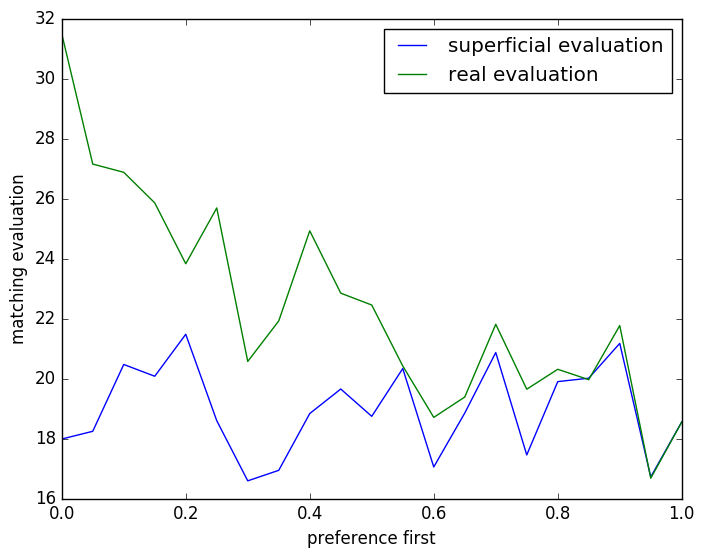

PyObject <matplotlib.legend.Legend object at 0x30fd865c0>

In [23]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
xlabel("preference first")
ylabel("matching evaluation")
legend()

superficial evaluationは, 設定したpreference firstの値のもとでの学科の選好が真の選好であるとした時のevaluationの値で, real evaluation　は, preference を元に計算したevaluationの値です. 両者はpreference first = 1の時に一致します.
グラフがカクカクしているので, 何回も試して平均を取ることにします.

In [3]:
using DataFrames
using PyPlot
using ExcelReaders
include("da.jl")
include("functions.jl")
student_num = 1000
mu = 0.5
sigma2 = 0.2
sigma2_error = 0.05

akiramenai = []
akirameru = []
preferences  = collect(linspace(0, 1, 20))
loops = 10
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = read_faculty_data("revised.csv", student_num)
        faculty_num = length(faculties_list)
        students_list = generate_students(student_num, mu, sigma2, sigma2_error, faculty_num, () -> preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        s_real_prefs = get_real_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        #println(s_prefs)
        #println(f_prefs)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))

        #sorted_students_list = get_sorted_students_list(students_list, faculties_list)
        #println(sorted_students_list)
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

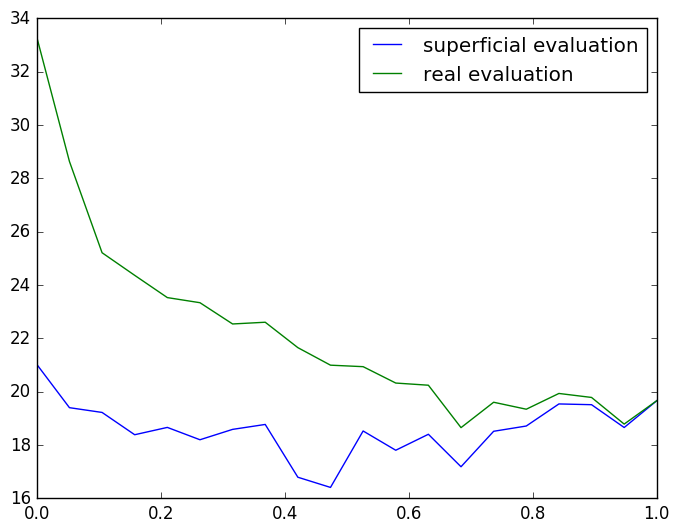

PyObject <matplotlib.legend.Legend object at 0x305f1a208>

In [4]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
legend()

preferenceが１に近い(自分が行きたいところに行く)と, マッチングの評価が高くなるように見えます. シミュレーションに時間がかかるので規模を小さくして実行してみます. 学科数５，生徒数100とし, 学科のcapを100/5とします.

In [5]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
loops = 100
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

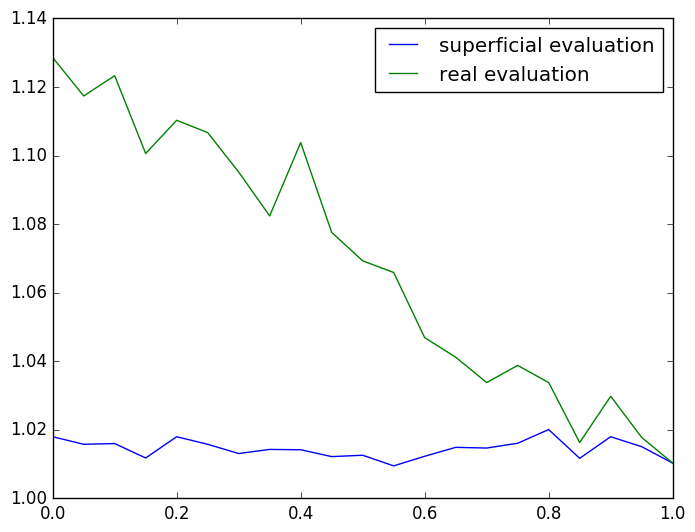

PyObject <matplotlib.legend.Legend object at 0x30fbf8048>

In [6]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
legend()

学科のcapを10~30の間で変えて, real evaluation の変化を見てみます.

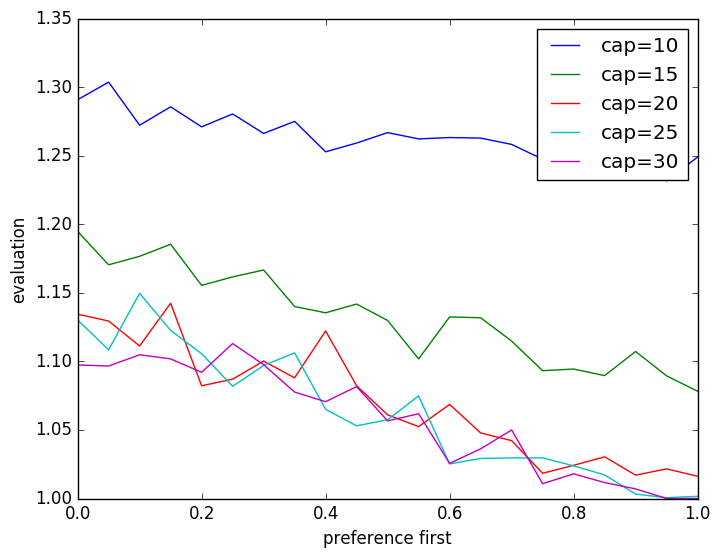

PyObject <matplotlib.legend.Legend object at 0x31adeadd8>

In [7]:
faculty_num = 5
students_num = 100

mu = 50
sigma2 = 30
sigma2_error = 5
preferences  = collect(0:0.05:1)
loops = 50
for cap in 10:5:30
    akiramenai = []
    for preference in preferences
        ev_sup = []
        ev_real = []
        for i in 1:loops
            faculties_list = generate_faculties(faculty_num, students_num)
            for f in faculties_list
                f.cap = cap
            end
            students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

            set_prefs_faculties(faculties_list, students_list)
            set_prefs_students(students_list, faculties_list)
            set_real_prefs_students(students_list, faculties_list)
            #println(faculties_list)

            s_prefs = generate_prefs(students_list)
            f_prefs = generate_prefs(faculties_list)
            caps = generate_caps(faculties_list)

            s_real_prefs = get_real_prefs(students_list)

            s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
            push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
            push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
        end
        push!(akiramenai, mean(ev_real))
    end
    plot(preferences, akiramenai, label="cap=$cap")
    xlabel("preference first")
    ylabel("evaluation")
end
legend()

結局, capを変えても自分のpreferenceを重視したほうがより良いマッチングになる傾向が読み取れます. つぎに, マッチングできず余る生徒について見てみます. 科類ごとに学科が一つある時について

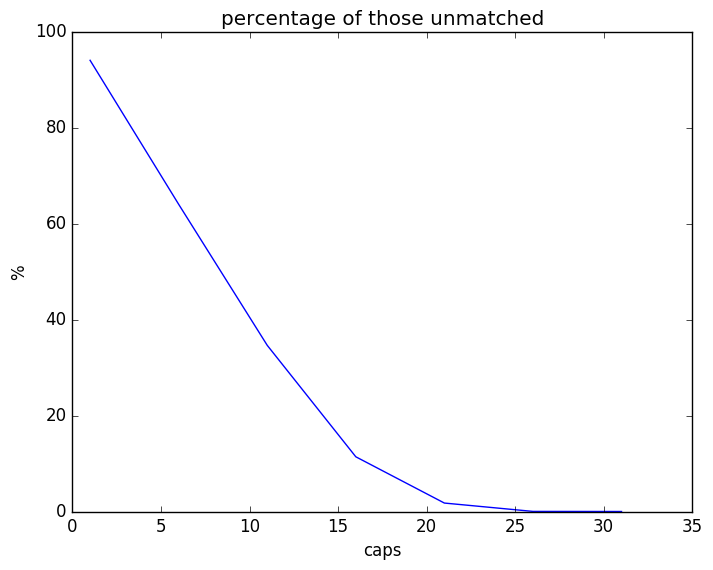

In [8]:
faculty_num = 6
students_num = 100

mu = 50
sigma2 = 30
sigma2_error = 5
preference  = 0.8
loops = 50
caps0 = collect(1:5:31)

akiramenai = []
for cap in caps0
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for (i, f) in enumerate(faculties_list)
            f.cap = cap
            f.available_for = [i]
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_real, evaluate_matched5(s_matched, s_real_prefs))
    end
    push!(akiramenai, mean(ev_real))
end
plot(caps0, 100.*(akiramenai.-1))
title("percentage of those unmatched")
ylabel("%")
xlabel("caps")
legend()

次に, 従来の進学振り分けとDAによる進学振り分けを比較してみます. まず従来の進振り(第一希望で成績順に合格者を決め, 残りは第二希望で同じように合格者を決める(?))で成績を重視する割合を変えてみると,

In [3]:
using PyPlot
include("functions.jl")
include("da.jl")
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
akiramenai = []
akirameru = []
preferences  = collect(0:0.05:1)
loops = 100
for preference in preferences
    ev_sup = []
    ev_real = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = easy_matching(students_list, caps, 2)
        push!(ev_sup,　evaluate_matched(s_matched, s_prefs))
        push!(ev_real, evaluate_matched(s_matched, s_real_prefs))
    end
    push!(akirameru, mean(ev_sup))
    push!(akiramenai, mean(ev_real))
end

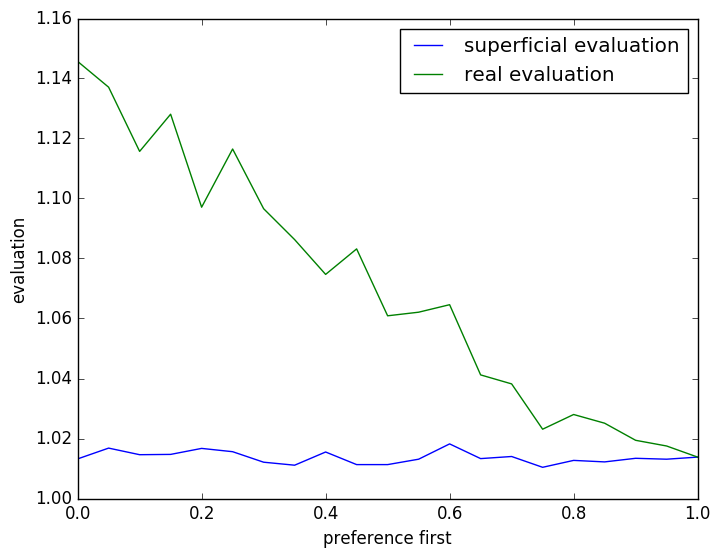

PyObject <matplotlib.legend.Legend object at 0x31e25ed30>

In [4]:
plot(preferences, akirameru, label="superficial evaluation")
plot(preferences, akiramenai, label="real evaluation")
xlabel("preference first")
ylabel("evaluation")
legend()

DAによるマッチングのevaluationもプロットしてみると,

In [17]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
da = []
traditional = []
real = []
preferences  = collect(linspace(0, 1, 20))
loops = 100
for preference in preferences
    ev_da = []
    ev_traditional = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_da,　evaluate_matched(s_matched, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps, 2)
        push!(ev_traditional, evaluate_matched(s_matched2, s_real_prefs))
    end
    push!(da, mean(ev_da))
    push!(traditional, mean(ev_traditional))
end

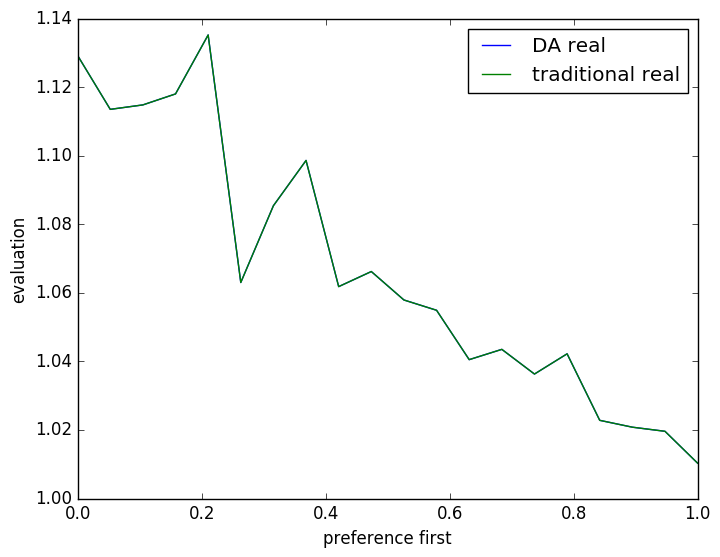

PyObject <matplotlib.legend.Legend object at 0x321e10a58>

In [19]:
using PyPlot
plot(preferences, da, label="DA real")
plot(preferences, traditional, label="traditional real")
xlabel("preference first")
ylabel("evaluation")
legend()

# 以下工事中

In [159]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
da = []
traditional = []
real = []
preferences  = collect(linspace(0, 1, 20))
loops = 100
for i in 1:loops
    ev_da = []
    ev_traditional = []
    faculties_list = generate_faculties(faculty_num, students_num)
    students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)
    for f in faculties_list
        f.cap = cap
    end
        
    for preference in preferences
        for s in students_list
            s.preference = preference
        end
        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_da,　evaluate_matched(s_matched, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps, 1)
        push!(ev_traditional, evaluate_matched(s_matched2, s_real_prefs))
    end
    push!(da, ev_da)
    push!(traditional, ev_traditional)
   # plot(preferences, ev_traditional, label="traditional real")
end

new_da = []
for i in 1:length(da[1])
    mean = sum([d[i] for d in da])/length(da)
    push!(new_da, mean)
end
new_traditional = []
for i in 1:length(traditional[1])
    mean = sum([d[i] for d in traditional])/length(traditional)
    push!(new_traditional, mean)
end

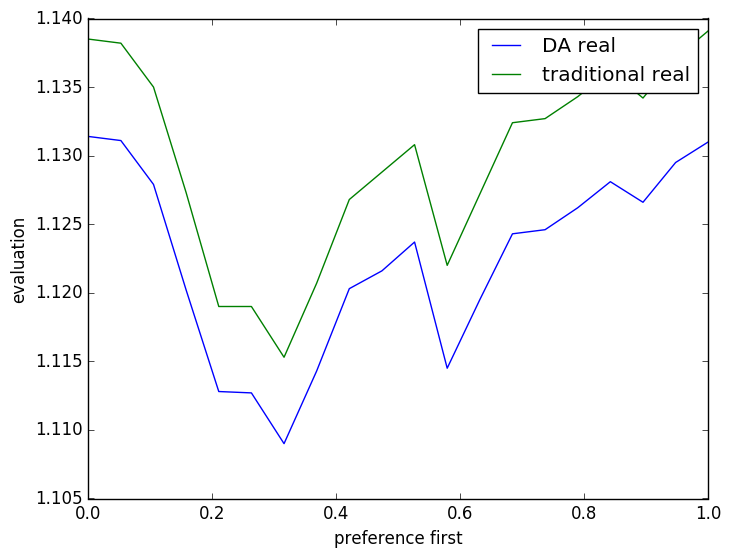

PyObject <matplotlib.legend.Legend object at 0x33343a390>

In [160]:
using PyPlot
plot(preferences, new_da, label="DA real")
plot(preferences, new_traditional, label="traditional real")
xlabel("preference first")
ylabel("evaluation")
legend()

## ?<!-- ほぼ同じ..? 学部のcapの数を5~25で動かしてみます. ついでに従来の第二段階選考で出せる希望の数を1~3にしたグラフも追加してみます. -->

In [32]:
faculty_num = 5
students_num = 100
caps0 = collect(5:5:25)
mu = 50
sigma2 = 30
sigma2_error = 5
da = []
traditional1 = []
traditional2 = []
traditional3 = []
real = []
preference = 0.8
loops = 100
for cap in caps0
    ev_da = []
    ev_traditional1 = []
    ev_traditional2 = []
    ev_traditional3 = []
    for i in 1:loops
        faculties_list = generate_faculties(faculty_num, students_num)
        for f in faculties_list
            f.cap = cap
        end
        students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->preference)

        set_prefs_faculties(faculties_list, students_list)
        set_prefs_students(students_list, faculties_list)
        set_real_prefs_students(students_list, faculties_list)
        #println(faculties_list)

        s_prefs = generate_prefs(students_list)
        f_prefs = generate_prefs(faculties_list)
        caps = generate_caps(faculties_list)

        s_real_prefs = get_real_prefs(students_list)

        s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
        push!(ev_da,　evaluate_matched(s_matched, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps, 1)
        push!(ev_traditional1, evaluate_matched(s_matched2, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps, 2)
        push!(ev_traditional2, evaluate_matched(s_matched2, s_real_prefs))
        s_matched2, f_matched2, indptr2 = easy_matching(students_list, caps, 3)
        push!(ev_traditional3, evaluate_matched(s_matched2, s_real_prefs))
    end
    push!(da, mean(ev_da))
    push!(traditional1, mean(ev_traditional1))
    push!(traditional2, mean(ev_traditional2))
    push!(traditional3, mean(ev_traditional3))
end

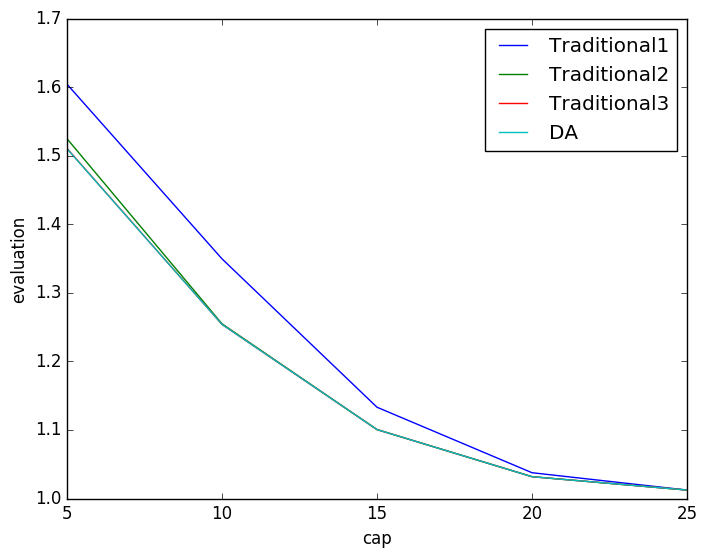

PyObject <matplotlib.legend.Legend object at 0x322d90240>

In [35]:
using PyPlot
plot(caps0, traditional1, label="Traditional1")
plot(caps0, traditional2, label="Traditional2")
plot(caps0, traditional3, label="Traditional3")
plot(caps0, da, label="DA")
xlabel("cap")
ylabel("evaluation")
legend()

（結果に間違いがなければ)capの数が大きい(学科定数に余裕がある)ときはDAによるマッチングのへの効果が薄く, また従来の方法でも希望の数を増やせばDAアルゴリズムと同じ全体への効果が見込めると考えられます..

次は個人に注目して, preferenceと成績の重視割合がそのマッチングにどのような影響をあたえるかを見てみます.

In [126]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
apersons = collect(1:5)
preferences  = collect(0:0.01:1)

ev_real = [[] for i in 1:length(apersons)]
faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)
set_prefs_faculties(faculties_list, students_list)
for f in faculties_list
    f.cap = cap
end
for preference in preferences
    for s in students_list
        s.preference = preference
    end
    set_prefs_students(students_list, faculties_list)
    set_real_prefs_students(students_list, faculties_list)

    s_prefs = generate_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    s_real_prefs = get_real_prefs(students_list)

    s_matched, f_matched, indptr = DA.call_match(s_prefs, f_prefs, caps)
    for (i, aperson) in enumerate(apersons)
        #push!(ev_sup,　findfirst(s_prefs[:, aperson], s_matched[aperson]))
        push!(ev_real[i], findfirst(s_real_prefs[:, aperson], s_matched[aperson]))
    end
end

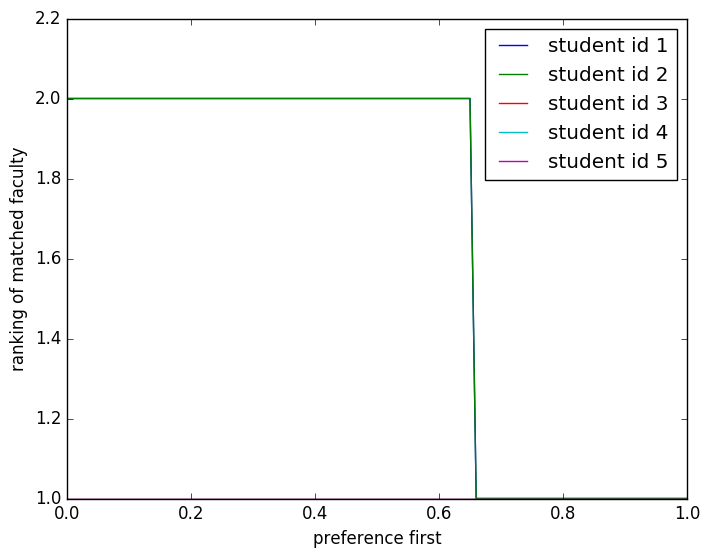

PyObject <matplotlib.legend.Legend object at 0x332298d68>

In [127]:
for i in 1:length(apersons)
    plot(preferences, ev_real[i], label="student id $(students_list[i].id)")
end
xlabel("preference first")
ylabel("ranking of matched faculty")
legend()

自分の行きたい所を希望する(preference first = 1)ときの方がやはり思い通りになるようです. 従来の進振りだと..

In [138]:
faculty_num = 5
students_num = 100
cap = div(students_num, faculty_num)
mu = 50
sigma2 = 30
sigma2_error = 5
apersons = collect(1:5)
preferences  = collect(0:0.01:1)

ev_real = [[] for i in 1:length(apersons)]
faculties_list = generate_faculties(faculty_num, students_num)
students_list = generate_students(students_num, mu, sigma2, sigma2_error, faculty_num, ()->0)
set_prefs_faculties(faculties_list, students_list)
for f in faculties_list
    f.cap = cap
end
for preference in preferences
    for s in students_list
        s.preference = preference
    end
    set_prefs_students(students_list, faculties_list)
    set_real_prefs_students(students_list, faculties_list)

    s_prefs = generate_prefs(students_list)
    f_prefs = generate_prefs(faculties_list)
    caps = generate_caps(faculties_list)

    s_real_prefs = get_real_prefs(students_list)

    s_matched, f_matched, indptr =  easy_matching(students_list, caps, 1)
    for (i, aperson) in enumerate(apersons)
        #push!(ev_sup,　findfirst(s_prefs[:, aperson], s_matched[aperson]))
        push!(ev_real[i], findfirst(s_real_prefs[:, aperson], s_matched[aperson]))
    end
end

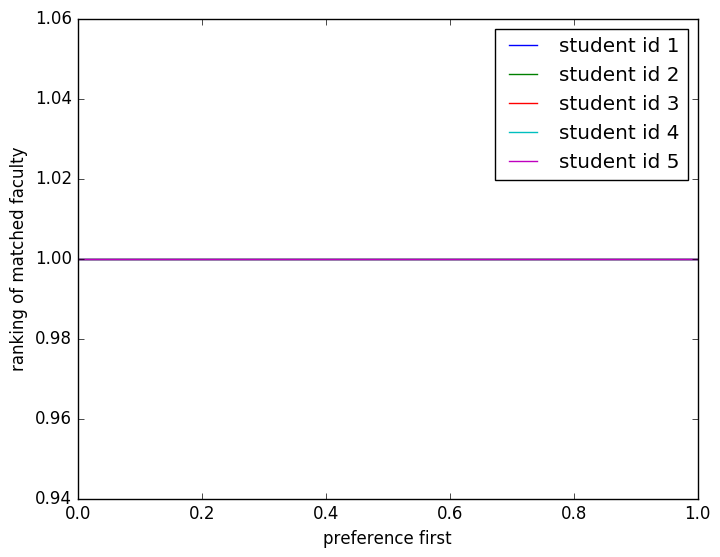

PyObject <matplotlib.legend.Legend object at 0x332f1e128>

In [139]:
for i in 1:length(apersons)
    plot(preferences, ev_real[i], label="student id $(students_list[i].id)")
end
xlabel("preference first")
ylabel("ranking of matched faculty")
legend()